In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

dataframe = pd.read_csv("clean_data-1.csv", delimiter = ",")
dataframe.head()

,id,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot
0,8.160000e+17,"""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1
2,4.303727e+09,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1
3,3.063139e+09,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1
4,2.955142e+09,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1


In [11]:
print("\nNumber of missing values in dataset by column: \n", dataframe.isnull().sum())


Number of missing values in dataset by column: 
 id                          0
screen_name                 0
location                  963
description               387
url                      1269
followers_count             0
friends_count               0
listed_count                0
created_at                  0
favourites_count            0
verified                    0
statuses_count              0
lang                        0
status                    279
default_profile             0
default_profile_image       0
name                        0
bot                         0
dtype: int64


In [12]:
#Dropping the url column because ~50% of its values are null and it's non-essential to differentiating bot accounts
dataframe.drop('url', 1, inplace=True)
dataframe.head()

/var/folders/t2/xjdlkf711j1cdzw14t6404840000gn/T/ipykernel_67977/1337331589.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop('url', 1, inplace=True)


,id,screen_name,location,description,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot
0,8.160000e+17,"""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1
2,4.303727e+09,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1
3,3.063139e+09,sc_papers,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1
4,2.955142e+09,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1


In [13]:
#Deleting the location column since ~35% of its values are null
dataframe.drop('location', 1, inplace=True)
dataframe.head()

/var/folders/t2/xjdlkf711j1cdzw14t6404840000gn/T/ipykernel_67977/1218382077.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop('location', 1, inplace=True)


,id,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot
0,8.160000e+17,"""HoustonPokeMap""","""Rare and strong PokŽmon in Houston, TX. See m...",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,kernyeahx,From late 2014 Socium Marketplace will make sh...,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1
2,4.303727e+09,mattlieberisbot,"Inspired by the smart, funny folks at @replyal...",1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1
3,3.063139e+09,sc_papers,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1
4,2.955142e+09,lucarivera16,Inspiring cooks everywhere since 1956.,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1


In [14]:
#Replacing null values in description column with "None" 
dataframe["description"].fillna("None", inplace=True)
dataframe.head()

,id,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot
0,8.160000e+17,"""HoustonPokeMap""","""Rare and strong PokŽmon in Houston, TX. See m...",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,kernyeahx,From late 2014 Socium Marketplace will make sh...,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1
2,4.303727e+09,mattlieberisbot,"Inspired by the smart, funny folks at @replyal...",1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1
3,3.063139e+09,sc_papers,None,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1
4,2.955142e+09,lucarivera16,Inspiring cooks everywhere since 1956.,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1


In [15]:
#Replacing null values in status column with "None" 
dataframe["status"].fillna("None", inplace=True)
dataframe.head()

,id,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot
0,8.160000e+17,"""HoustonPokeMap""","""Rare and strong PokŽmon in Houston, TX. See m...",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,kernyeahx,From late 2014 Socium Marketplace will make sh...,1,349,0,2/1/2016 7:37,38,False,31,en,None,True,False,Keri Nelson,1
2,4.303727e+09,mattlieberisbot,"Inspired by the smart, funny folks at @replyal...",1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1
3,3.063139e+09,sc_papers,None,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1
4,2.955142e+09,lucarivera16,Inspiring cooks everywhere since 1956.,11,745,0,1/1/2015 17:44,146,False,185,en,None,False,False,lucarivera16,1


In [16]:
#Now all null values should be handled
print("\nNumber of missing values in dataset by column: \n", dataframe.isnull().sum())


Number of missing values in dataset by column: 
 id                       0
screen_name              0
description              0
followers_count          0
friends_count            0
listed_count             0
created_at               0
favourites_count         0
verified                 0
statuses_count           0
lang                     0
status                   0
default_profile          0
default_profile_image    0
name                     0
bot                      0
dtype: int64


AttributeError: 'PathCollection' object has no attribute 'set_title'

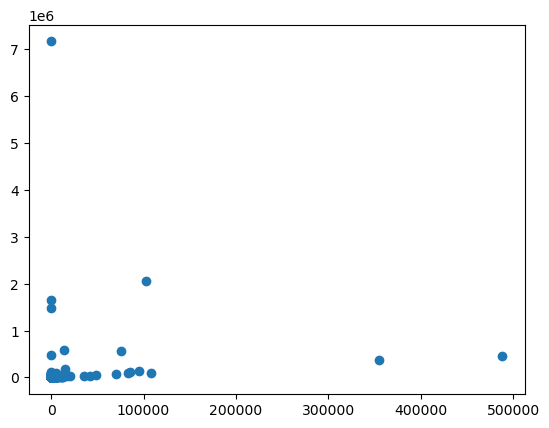

In [92]:
#Plotting friends_count vs. followers_count
dataframe.iloc[0:1237].plot(x="friends_count", y="followers_count", xlabel="Number of Friends", ylabel="Number of Followers (in millions)", kind="scatter", title="Bots Friends vs. Followers Count")
dataframe.iloc[1237:2673].plot(x="friends_count", y="followers_count", xlabel="Number of Friends (in millions)", ylabel="Number of Followers (in hundred millions)", kind="scatter", title="Non-Bots Friends vs. Followers Count")

<Axes: title={'center': 'Bot (1.0) & Non-Bot (0.0) Listed Count '}, xlabel='bot', ylabel='listed_count'>

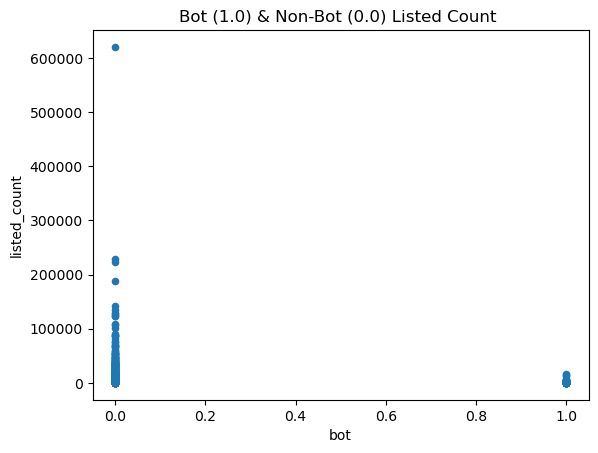

In [76]:
#Plotting listed_count for bots and non-bots
dataframe.plot(x="bot", y="listed_count", kind="scatter", title="Bot (1.0) & Non-Bot (0.0) Listed Count ")


In [61]:
#Feature Engineering - beginning to classify accounts based on bot-related keywords
bag_of_words = ['bot', 'follow me', 'free', 'fake', 'virus', 'troll', 'clone', 'tweet me']
pattern = '|'.join(bag_of_words)

dataframe['screen_name_binary'] = dataframe['screen_name'].str.lower().str.contains(pattern)
dataframe['name_binary'] = dataframe['name'].str.lower().str.contains(pattern)
dataframe['description_binary'] = dataframe['description'].str.lower().str.contains(pattern)
dataframe['status_binary'] = dataframe['status'].str.lower().str.contains(pattern)

dataframe.head()

,id,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot,screen_name_binary,name_binary,description_binary,status_binary
0,8.160000e+17,"""HoustonPokeMap""","""Rare and strong PokŽmon in Houston, TX. See m...",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1,False,False,False,False
1,4.843621e+09,kernyeahx,From late 2014 Socium Marketplace will make sh...,1,349,0,2/1/2016 7:37,38,False,31,en,None,True,False,Keri Nelson,1,False,False,False,False
2,4.303727e+09,mattlieberisbot,"Inspired by the smart, funny folks at @replyal...",1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1,True,True,True,True
3,3.063139e+09,sc_papers,None,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1,False,False,False,False
4,2.955142e+09,lucarivera16,Inspiring cooks everywhere since 1956.,11,745,0,1/1/2015 17:44,146,False,185,en,None,False,False,lucarivera16,1,False,False,False,False


In [65]:
#Machine Learning - determining whether an account is a bot or not
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feature_cols = ['friends_count', 'followers_count', 'screen_name_binary', 'name_binary', 'status_binary', 'verified', 'statuses_count']
x = dataframe[feature_cols]
y = dataframe.bot

dt = DecisionTreeClassifier(criterion='entropy')
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
dt = dt.fit(x_train, y_train)
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

print('Training Accuracy: ', accuracy_score(y_train, y_pred_train))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test))

Training Accuracy:  0.9983957219251337
Testing Accuracy:  0.8566084788029925
